In [ ]:
pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time


# classifiers and metrics
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer



In [ ]:
# Modeling pump and dump on Cryptopia as this is the most active exchange with pump and dump schemes as
# well as we were able to get the all necessary data from it.

def load_data():

    reg_cryptopia = pd.read_csv("/content/drive/MyDrive/[Senior] SW Project /Pump_data/reg_cryptopia.csv")
    reg_cryptopia['datetime'] = pd.to_datetime(reg_cryptopia['datetime'],unit='s')
    reg_cryptopia = shuffle(reg_cryptopia)
    reg_cryptopia.reset_index(inplace=True, drop=True)
    return reg_cryptopia

In [ ]:
# load_data()["pumped"].value_counts()
data=load_data()
data.fillna(0,inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [ ]:
data["pumped"].value_counts()

False    70120
True       119
Name: pumped, dtype: int64

In [ ]:
data.shape

(70239, 55)

In [ ]:
# prepare the data for training and testing


X_reg = data[["pumpedtimes","last_price","views","caps","volumefrom3h","volumeto3h","return3h","returnvola3h",
              "volumetovola3h"]]  # or X
x=X_reg

Y_reg = data["pumped"]  # or Y
y=Y_reg.astype(int)



In [ ]:
# the data is split with different ratios 
# return all these set of X and Y in training data so we can use them to train the models

from imblearn.over_sampling import SMOTE
sm = SMOTE()

x_pre=x.to_numpy()
x_res, y_res = sm.fit_resample(x_pre, y)

# split into train test sets and plus scale the data
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=8)

# from sklearn import preprocessing
# x_train = preprocessing.scale(x_train)
# x_test = preprocessing.scale(x_test)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
data.caps.describe()

count    7.023900e+04
mean     4.442560e+04
std      7.320173e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.600000e+01
75%      4.430000e+02
max      1.735859e+07
Name: caps, dtype: float64

Step2. Make Visualizations

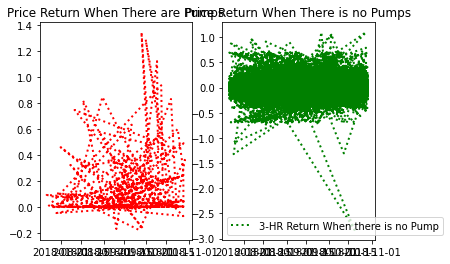

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# using subplot function and creating plot one
plt.subplot(1, 2, 1)


plt.plot(data.loc[data["pumped"]==True, "datetime"], data.loc[data["pumped"]==True,
                                  "return3h"], 'r', linewidth=2, linestyle=':', label="3-HR Return When Pump")
plt.title('Price Return When There are Pumps')

 
# using subplot function and creating plot two row 1, column 2, count 2
plt.subplot(1, 2, 2)
plt.plot(data.loc[data["pumped"]==False, "datetime"],data.loc[data["pumped"]==False, 
                                   "return3h"], 'g', linewidth=2, linestyle=':', label="3-HR Return When there is no Pump")
# plt.title('Price Return When There are Pumps')
plt.title('Price Return When There is no Pumps')
plt.legend()
# space between the plots
 
# show plot
plt.show()

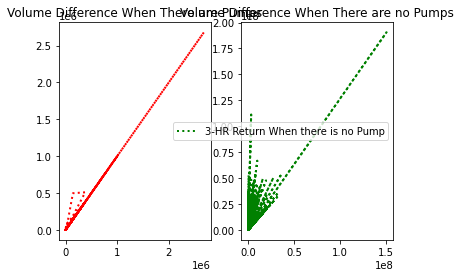

In [ ]:
# Visualizing the relationship between volume difference between last week and this week


plt.subplot(1, 2, 1)


plt.plot(data.loc[data["pumped"]==True, "last_volumefrom"], data.loc[data["pumped"]==True,
                                  "volumefrom3h"], 'r', linewidth=2, linestyle=':', label="3-HR Return When Pump")
plt.title('Volume Difference When There are Pumps')

 
# using subplot function and creating plot two row 1, column 2, count 2
plt.subplot(1, 2, 2)
plt.plot(data.loc[data["pumped"]==False, "last_volumefrom"],data.loc[data["pumped"]==False, 
                                   "volumefrom3h"], 'g', linewidth=2, linestyle=':', label="3-HR Return When there is no Pump")
# plt.title('Price Return When There are Pumps')
plt.title('Volume Difference When There are no Pumps')
plt.legend()
# space between the plots
 
# show plot
plt.show()

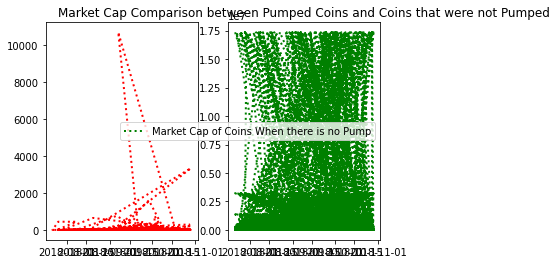

In [ ]:
# Visualizing the market caps of coins that were pumped vs not pumped


plt.subplot(1, 2, 1)


plt.plot(data.loc[data["pumped"]==True, "datetime"], data.loc[data["pumped"]==True,
                                  "caps"], 'r', linewidth=2, linestyle=':', label="Market Cap of Coins When Pump")

 
# using subplot function and creating plot two row 1, column 2, count 2
plt.subplot(1, 2, 2)
plt.plot(data.loc[data["pumped"]==False, "datetime"],data.loc[data["pumped"]==False, 
                                   "caps"], 'g', linewidth=2, linestyle=':', label="Market Cap of Coins When there is no Pump")
# plt.title('Price Return When There are Pumps')
plt.title('Market Cap Comparison between Pumped Coins and Coins that were not Pumped')
plt.legend()
# space between the plots
 
# show plot
plt.show()

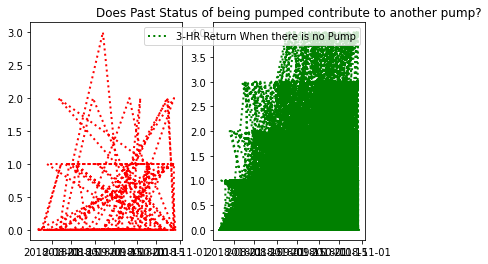

In [ ]:
# Visualizing the status of being pumped in the past contributes to being pumped in the future

plt.subplot(1, 2, 1)


plt.plot(data.loc[data["pumped"]==True, "datetime"], data.loc[data["pumped"]==True,
                                  "pumpedtimes"], 'r', linewidth=2, linestyle=':', label="3-HR Return When Pump")


 
# using subplot function and creating plot two row 1, column 2, count 2
plt.subplot(1, 2, 2)
plt.plot(data.loc[data["pumped"]==False, "datetime"],data.loc[data["pumped"]==False, 
                                   "pumpedtimes"], 'g', linewidth=2, linestyle=':', label="3-HR Return When there is no Pump")
# plt.title('Price Return When There are Pumps')
plt.title("Does Past Status of being pumped contribute to another pump?")
plt.legend()
# space between the plots
 
# show plot
plt.show()



```
# 코드로 형식 지정됨
```

Step 3.Make an ML (KNN) Model with ADJUSTING for the imbalance in the data so that pumps and dumps can be better predicted

(98168, 10) (42072, 10) (98168,) (42072,)


In [ ]:
np.bincount(y_train)

array([49139, 49029])

In [ ]:
MLC={
    "LogisticRegression": LogisticRegression(solver = 'lbfgs'),
    "GradientBoostClassifier": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(5),    
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
    }


In [ ]:
MLC_CV = pd.DataFrame(columns=['model', 'run_time', 'avg_pre', 'avg_pre_std'])

for classifier in MLC:

    print('*',classifier)

    start_time=time.time()

    classifier = MLC[classifier]
    model = classifier.fit(x_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=9)
    scorer = make_scorer(average_precision_score)
    cv_scores = cross_val_score(model, x_test, y_test, cv=10, scoring=scorer)
    y_pred = model.predict(x_test)

    row = {'model': classifier,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'avg_pre': cv_scores.mean(),
           'avg_pre_std': cv_scores.std(),

           }
           
    MLC_CV = MLC_CV.append(row, ignore_index=True)




* LogisticRegression
* GradientBoostClassifier
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* AdaBoostClassifier


In [ ]:
MLC_CV=MLC_CV.sort_values(by="avg_pre", ascending=False)

MLC_CV=MLC_CV.round(decimals = 3)
MLC_CV

,model,run_time,avg_pre,avg_pre_std
4,"(DecisionTreeClassifier(max_features='auto', r...",1.55,0.962,0.004
3,DecisionTreeClassifier(),0.07,0.961,0.005
1,([DecisionTreeRegressor(criterion='friedman_ms...,1.87,0.864,0.008
2,KNeighborsClassifier(),0.08,0.848,0.008
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.49,0.802,0.007
0,LogisticRegression(),0.06,0.548,0.012


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Run

In [ ]:

DC_result = pd.DataFrame()
classifiers={
   
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(solver = 'lbfgs'),
    "GradientBoostClassifier": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(5), 
    "AdaBoostClassifier": AdaBoostClassifier()


    }

for c in classifiers:
  c=classifiers[c]
  model = c.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  avg_precision = average_precision_score(y_test, y_pred)


  row = {'model': c,
          'recall': recall,
          'precision': precision,
      
          'f1': f1,     
      }
  DC_result=DC_result.append(row,ignore_index=True)

In [ ]:
DC_result=DC_result.round(decimals = 4)
DC_result

,model,recall,precision,f1
0,DecisionTreeClassifier(),0.9729,0.9846,0.9787
1,"(DecisionTreeClassifier(max_features='auto', r...",0.9333,0.9890,0.9603
2,LogisticRegression(),0.6260,0.5783,0.6012
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.8396,0.9373,0.8858
4,KNeighborsClassifier(),0.9624,0.8962,0.9281
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.7583,0.9009,0.8235


In [ ]:
# Feature Importance Graph 
decisionc = DecisionTreeClassifier()
decisionc.fit(x_train, y_train)
for name, importance in zip(X_reg, decisionc.feature_importances_):
   print(name, "=", importance)

pumpedtimes = 0.2038736771429546
last_price = 0.0785228939948686
views = 0.11838346131497576
caps = 0.19169847332369797
volumefrom3h = 0.08123235282675831
volumeto3h = 0.010284210142539758
return3h = 0.2440483501401371
returnvola3h = 0.018432296717251346
volumetovola3h = 0.05352428439681658


<function matplotlib.pyplot.show>

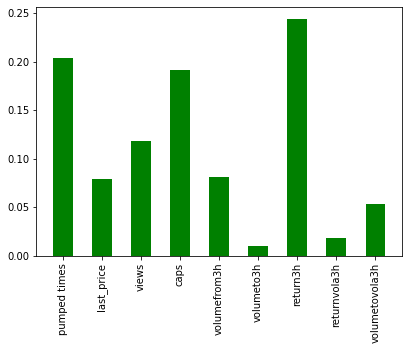

In [ ]:
# graph feature importance
feature_dict={"pumped times" : 0.2038736771429546,
"last_price" : 0.0785228939948686,
"views" : 0.11838346131497576,
"caps" : 0.19169847332369797,
"volumefrom3h" : 0.08123235282675831,
"volumeto3h" : 0.010284210142539758,
"return3h" : 0.2440483501401371,
"returnvola3h" : 0.018432296717251346,
'volumetovola3h' : 0.05352428439681658}

plt.bar(feature_dict.keys(), feature_dict.values(), width=0.5,color='g')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show